In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score 

In [2]:
def freq_enc(df, cols):
    for col in cols:
        df[col]= df[col].map(round(df[col].value_counts()/len(df),4))
    return df

def to_df(data, cols):
    df= pd.DataFrame(data, columns= cols)
    return df

In [3]:
df= pd.read_csv("Car_price_dataset.csv")
df.shape

(8128, 13)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
from sklearn.impute import SimpleImputer
impute= SimpleImputer(strategy= 'most_frequent')
df_cols= df.columns
df= to_df(impute.fit_transform(df), df_cols)

df['name']= df['name'].apply(lambda x: x.split(' ')[0])
df= freq_enc(df, ['name', 'year'])

df['engine']= df['engine'].apply(lambda x: float(x.split(' ')[0].strip()))
df['mileage']= df['mileage'].apply(lambda x: float(x.split(' ')[0].strip()))

df= pd.get_dummies(df, columns= ['fuel', 'seller_type', 'transmission', 'owner'], drop_first= True)

y= df['selling_price']
df.drop(['torque', 'selling_price', 'max_power'], 1, inplace= True)


from sklearn.preprocessing import StandardScaler
df_cols= df.columns
scaler= StandardScaler()
df= to_df(scaler.fit_transform(df), df_cols)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score 

In [7]:
X_train, X_test, y_train, y_test= train_test_split(df, y.astype(float), test_size= 0.25, random_state= 2)

In [8]:
model=LGBMRegressor(eval_metric= 'RMSE', random_state=1, learning_rate=0.05, depth= 6, l2_leaf_reg=12, 
                        random_strength=0, n_estimators=1000)
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              depth=6, eval_metric='RMSE', importance_type='split',
              l2_leaf_reg=12, learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1, random_strength=0, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [9]:
# for train data
pred_train= model.predict(X_train)
mae= mean_absolute_error(pred_train, y_train)
mse= mean_squared_error(pred_train, y_train)
r2= r2_score(pred_train, y_train)
print(f'Train MAE: {mae} \n Train MSE: {mse**0.5} \n Test r2_score: {r2}')

# for test data
pred_test= model.predict(X_test)
mae= mean_absolute_error(pred_test, y_test)
mse= mean_squared_error(pred_test, y_test)
r2_= r2_score(y_test, pred_test)
print(f'\nTest MAE: {mae} \n Test MSE: {mse**0.5} \n Train r2_score: {r2_}')

Train MAE: 45762.26810890422 
 Train MSE: 71948.71461069131 
 Test r2_score: 0.9922479103942685

Test MAE: 78646.50637881775 
 Test MSE: 164905.89936398895 
 Train r2_score: 0.9511667137280075


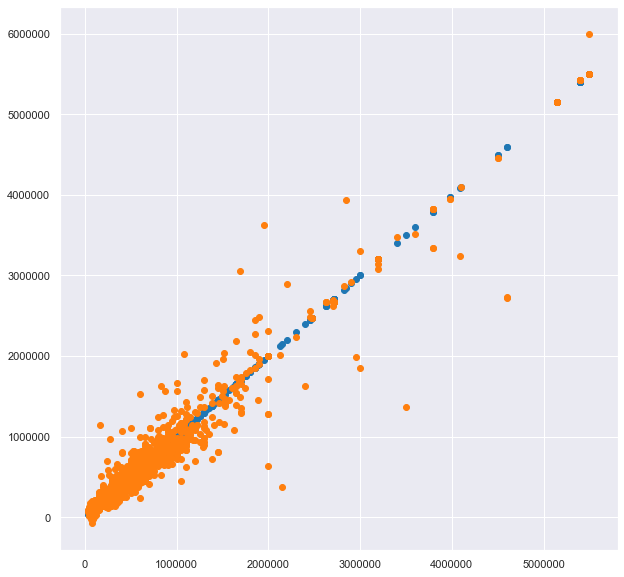

In [10]:
plt.scatter(y_test, y_test)
plt.scatter(y_test, pred_test)

In [12]:
import joblib
joblib.dump(model, 'car_price_model.h5')

['car_price_model.h5']